In [5]:
import numpy as np
import datetime as dt
import matplotlib.dates as md
import matplotlib.pyplot as mp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# np.sign()   sign函数可以把样本数组的变成对应的符号数组，正数变为1，负数变为-1，0则变为0。
# np.diff()   求出差数列

In [6]:
a = np.arange(10)
b = np.diff(a)
a,b


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [7]:
def changeDate(dmy):
    dmy = str(dmy, encoding='utf-8')
    ti = dt.datetime.strptime(dmy, '%Y%m%d').date()
    t = ti.strftime('%Y-%m-%d')
    return t


stock = np.loadtxt('000607.csv', delimiter=',', usecols=(0, 2, 3, 4, 5, 9),
                   skiprows=4000,
                   unpack=True,
                   max_rows=120,
                   dtype='M8[D],f8,f8,f8,f8,f8', converters={0: changeDate})

dates, opening_prices, highest_prices, lowest_prices, closing_prices, volumes = stock
dates = dates[1:].astype(md.datetime.datetime)


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'On-Banlance Volume')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'OBV')

<BarContainer object of 119 artists>

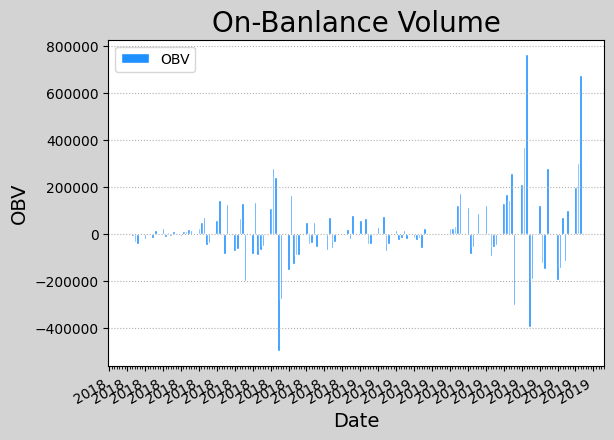

In [8]:
diff_closing_prices = np.diff(closing_prices)
sign_closing_prices = np.sign(diff_closing_prices)
obvs = volumes[1:] * sign_closing_prices
mp.figure('On-Banlance Volume', facecolor='lightgray')
mp.title('On-Banlance Volume', fontsize=20)
mp.xlabel('Date', fontsize=14)
mp.ylabel('OBV', fontsize=14)
ax = mp.gca()
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_minor_locator(md.DayLocator())

mp.grid(axis='y', linestyle=':')

mp.bar(dates, obvs, width = 1, color='dodgerblue', edgecolor='white', label='OBV')
mp.legend()
mp.gcf().autofmt_xdate()
mp.show()

<pre>```python
ary = np.piecewise(源数组, 条件序列, 取值序列)
```

针对源数组中的每一个元素，检测其是否符合条件序列中的每一个条件，符合哪个条件就用取值系列中与之对应的值，表示该元素，放到目标 数组中返回。</pre>

In [21]:
a = np.array([70, 80, 60, 30, 40])
d = np.piecewise(
    a, 
    [a < 60, a == 60, a > 60,  a>77,a>75],  # 取最后一个符合条件的
    [-1, 8, 444, 3, 999])  # 只能是数字

d

array([444, 999,   8,  -1,  -1])

<pre>## 矢量化

矢量化指的是用数组代替标量来操作数组里的每个元素。

numpy提供了vectorize函数，可以把处理标量的函数矢量化，返回的函数可以直接处理ndarray数组。</pre>

In [26]:
import math as m
import numpy as np

def foo(x, y):
    return m.sqrt(x**2 + y**2)

x, y = 1, 4
print(foo(x, y))
X, Y = np.array([1, 2, 3]), np.array([4, 5, 6])
vectorized_foo = np.vectorize(foo)
vectorized_foo(X, Y)
np.vectorize(foo)(X, Y)

4.123105625617661


array([4.12310563, 5.38516481, 6.70820393])

array([4.12310563, 5.38516481, 6.70820393])

In [29]:
fun = np.frompyfunc(foo, 2, 1) # func 输入值个数， 输出值个数
fun(X, Y)  # 返回的总是object数据类型

array([4.123105625617661, 5.385164807134504, 6.708203932499369],
      dtype=object)

In [32]:
oct_vec = np.frompyfunc(chr, 1, 1)
arr = [243,343,53433]
oct_vec(arr)

array(['ó', 'ŗ', '킹'], dtype=object)

In [34]:
map(chr,arr)  # 都可以避免写for循环
for i in map(chr, arr):
    print(i)

ó
ŗ
킹
